<a href="https://colab.research.google.com/github/cafechungkhoan/lyd-report/blob/main/DXS_27092021_Comment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LYD - Comment Sentiment Analysis**

*LYD là hệ thống áp dụng Deep Learning dùng để quét, tóm tắt, phân tích và dự báo cảm xúc của nhà đầu tư. Với mục đích hỗ trợ nghiệp vụ tư vấn IR (Investor Relation)*

**Dữ liệu input**: 
là dữ liệu bình luận (text) của nhà đầu tư trên mạng xã hội và các diễn đàn chứng khoán lớn. Quy mô tracking 700k user

**Các Model áp dụng**: 
Bert, transformer, SVM, PhoBERT 

### **LYD trả lời các câu hỏi chính**:
* **Mã cổ phiếu của doanh nghiệp có được nhà đầu tư yêu thích không?** (Áp dụng Text Classification Model xác định trạng thái cảm xúc của nhà đầu tư hiện tại là tích cực (hài lòng) hay tiêu cực (không hài lòng) về cổ phiếu YYY được xác định trước.)
* **Nhà đầu tư đang bàn tán gì về cổ phiếu doanh nghiệp?** (Áp dụng Topic Cluster Model phân loại các chủ đề chính cơ bản / kĩ thuật / thời sự & vĩ mô / tin đồn) của cổ phiếu YYY được xác định trước.)
* **Đâu là chủ đề nhà đầu tư thích nhất về cổ phiếu?** (Áp dụng BERT Text Summarize để tóm tắt nội dung comment)

---

In [ ]:
#@title Input Parameter
a = input('Nhập mã cần search: ')
b= input('Nhập giới hạn comment: ')

Nhập mã cần search: dxs
Nhập giới hạn comment: 1000


## **Phân tích người tham gia bình luận**

Ý nghĩa của biểu đồ: Biểu diễn bằng chart violin, quan sát mật độ phân phối số lượng bình luận của các user
*   Xác định có vấn đề seeding bình luận ảo không
*   Xác định nhóm người theo sentiment



Số bình luận =  294 . Số người tham gia bình luận =  198 . Median comment / user =  1.0


Text(0.5, 1.0, 'ViolinPlot số lượng comment của người tham gia bình luận')

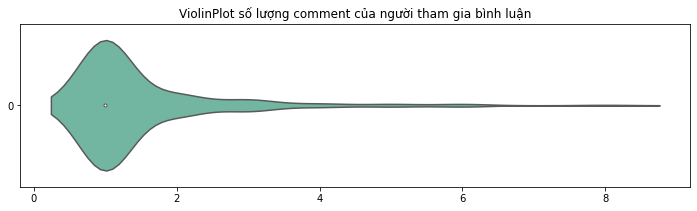

In [ ]:
#@title    

import matplotlib.pyplot as plt
import seaborn as sns
so_nguoi = data.groupby('user.name').count().reset_index()
print('Số bình luận = ',len(data),'. Số người tham gia bình luận = ', len(so_nguoi),'. Median comment / user = ', so_nguoi['originalContent'].median())
plt.figure(figsize = (12,3))
sns.violinplot(data=so_nguoi['originalContent'], orient="h", palette="Set2").set_title('ViolinPlot số lượng comment của người tham gia bình luận')

# **Visualize Sentiment Analysis**

Ý nghĩa của biểu đồ: Biểu diễn số lượng bình luận tích cực / tiêu cực / trung tính theo khung thời gian.
* Positive Comment: Bình luận được máy nhận diện là tích cực
* Negative Comment: Bình luận được máy nhận diện là tiêu cực
* Neutral Comment: Bình luận được máy nhận diện là không có trạng thái cảm xúc (hoặc máy không nhận diện được)

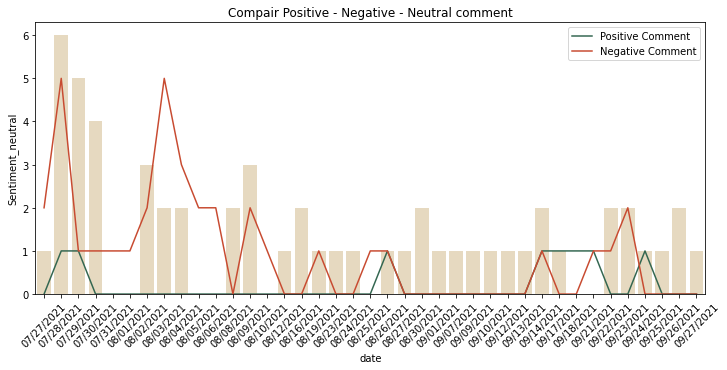

In [ ]:
#@title Visualize Sentiment Analysis { vertical-output: true }
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

x = data1['Sentiment_positive']
y = data1['date']
z = data1['Sentiment_negative']
neu = data1['Sentiment_neutral']

import seaborn as sns
sns.set_color_codes("muted")
plt.figure(figsize = (12,5))
plt.xticks(rotation=45)
plt.title('Compair Positive - Negative - Neutral comment')
sns.lineplot(x=y, y=x,label="Positive Comment", color="#346751")
sns.lineplot(x=y,y =z, label ="Negative Comment", color = '#C84B31')
sns.barplot(x=y,y =neu, label ="Neutral Comment", color = '#ECDBBA')

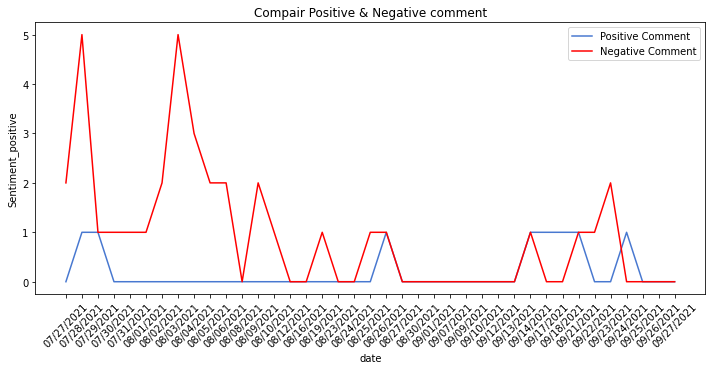

In [ ]:
#@title Drop Neutral { vertical-output: true }
import seaborn as sns
sns.set_color_codes("muted")
plt.figure(figsize = (12,5))
plt.xticks(rotation=45)
plt.title('Compair Positive & Negative comment')
sns.lineplot(x=y, y=x,label="Positive Comment", color="b")
sns.lineplot(x=y,y =z, label ="Negative Comment", color = 'red')

# **Visualize Topic Cluster**

Ý nghĩa biểu đồ: Phân loại comment theo 4 nhóm: Cơ bản / Kĩ thuật / Vĩ mô / Tin đồn. Và nhận diện cảm xúc (tích cực / tiêu cực) trên từng loại topic

Text(0.5, 1.0, 'Topic Tin đồn')

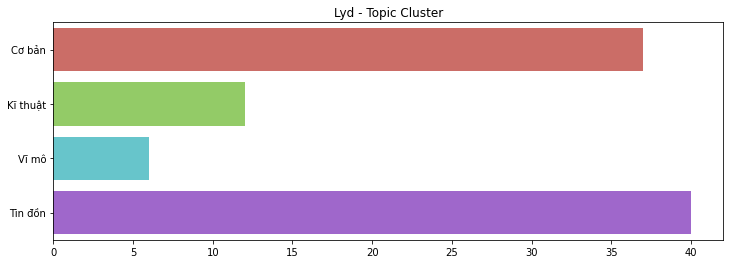

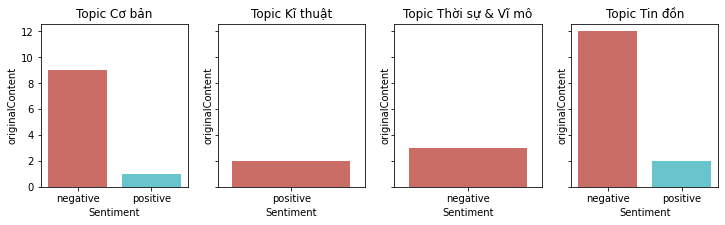

Số comment cơ bản =  37 . Số người tham gia comment =  33
Số comment kĩ thuật =  12 . Số người tham gia comment =  9
Số comment thời sự & vĩ mô =  6 . Số người tham gia comment =  6
Số comment tin đồn =  40 . Số người tham gia comment =  38


## **Graph Knowledge**

## **Text Summarization (tin đồn) using BERT**

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
#@title Text Summarize Result { vertical-output: true }
# tin_don = pd.DataFrame(tin_don)
# for i in tin_don['originalContent']:
#     result = model(i, min_length = 1)
#     full = ''.join(result)
#     print('>>>',full)

In [ ]:
tin_don_show = tin_don.drop(['Content_Processed','Sentiment','Content_Tokenize'], axis = 1)
tin_don_show

,index,originalContent,date,user.name,Text_Summarize
0,25,"Con hàng nhọ nhất hệ mặt trời. Sau 2 lần vừa lên sàn và chuyển sàn... ae đầu tư thành ae "" đầu ti"" hết lượt",09/09/2021,TỔ NGHIỆP NGÀNH CHỨNG,Con hàng nhọ nhất hệ mặt trời.
1,29,"𝗡𝗵𝗮̣̂𝗻 đ𝗶̣𝗻𝗵 𝘁𝗵𝗶̣ 𝘁𝗿𝘂̛𝗼̛̀𝗻𝗴 𝟯𝟬/𝟬𝟴:\n- Vnindex đóng cửa tăng +12.08 điểm (+0.93%) lên 1313.02 điểm.\n- Giao dịch khối ngoại bán ròng -384.84 tỷ tập trung chủ yếu VJC,PNJ,HPG.\n- Tự doanh bán ròng chủ yếu các mã CTG,MBB,VPB.\n- Phiên thứ 6 vừa rồi là một phiên ""Wash out"" thị trường hồi phục, thanh khoản tăng lên cho thấy được vùng hỗ trợ 1280-1300 là vùng hỗ trợ mạnh của thị trường trong giai đoạn rồi. Thị trường hôm nay sẽ theo đà hồi phục , kháng cự tiếp theo sẽ là vùng 1330.\n- Dòng Bank cuối phiên rồi có LPB bị đạp mạnh, khối ngoại thì vẫn tiếp tục mua vào MBB STB CTG. Khả năng phiên nay sẽ có nhịp hồi của dòng Bank. Còn để đi lên tiếp thì cần phải có sự hấp thụ và tích luỹ.\n ✅𝗗𝗮𝗻𝗵 𝗺𝘂̣𝗰 𝗰𝗼̂̉ 𝗽𝗵𝗶𝗲̂́𝘂 𝟯𝟬/𝟬𝟴:\nHôm 26/08 mua LCG, FCN , PC1 tiếp tục nắm giữ\n- Nay bổ sung thêm CII 17-17.5, DXG 21.5-22, SCR 10.5-10.8, VGT 19.5-20, PVS 24.5-25, HBC 14.5 (trung hạn).\n𝗖𝗵𝘂́ 𝘆́ 𝗹𝗮̀ 𝗻𝗲̂́𝘂 𝗺𝘂𝗮 𝗵𝗼̂𝗺 𝗻𝗮𝘆 𝘁𝗵𝗶̀ 𝗾𝘂𝗮 𝗹𝗲̂̃ 𝗵𝗮̀𝗻𝗴 𝗧+ 𝗺𝗼̛́𝗶 𝘃𝗲̂̀ 𝗻𝗵𝗲́ 𝗔𝗻𝗵/ 𝗖𝗛𝗶̣\n",08/30/2021,Hoàng Quân,"𝗡𝗵𝗮̣̂𝗻 đ𝗶̣𝗻𝗵 𝘁𝗵𝗶̣ 𝘁𝗿𝘂̛𝗼̛̀𝗻𝗴 𝟯𝟬/𝟬𝟴:\n- Vnindex đóng cửa tăng +12.08 điểm (+0.93%) lên 1313.02 điểm. - Giao dịch khối ngoại bán ròng -384.84 tỷ tập trung chủ yếu VJC,PNJ,HPG. - Tự doanh bán ròng chủ yếu các mã CTG,MBB,VPB."
2,30,"📈𝗡𝗵𝗮̣̂𝗻 đ𝗶̣𝗻𝗵 𝘁𝗵𝗶̣ 𝘁𝗿𝘂̛𝗼̛̀𝗻𝗴 𝟮𝟳/𝟬𝟴:📈\n- Vnindex đóng cửa giảm -8.43 điểm (-0.64%) về 1301.12 điểm.\n- Giao dịch khối ngoại bán ròng -403.69 tỷ tập trung chủ yếu VHM,CTG,HPG.\n- Tự doanh bán ròng -243.24 tỷ chủ yếu các mã HPG,TCB,VIC.\n- Phiên hôm qua là phiên hàng giá tốt hơn phiên 50k tỷ nên khi thị trường đi lên vẫn xuất hiện nhưng áp lực bán và mạnh lên ở cuối phiên, lực bán chủ yếu đến từ nhóm\nVN30 và nhóm Bank, tuy nhiên vẫn thấy được khi thị trường giảm về 1295 cũng có lực cầu vào đỡ khá tốt, đưa chỉ số hồi phục lên đóng cửa trên 1300. Thanh khoản có phần nhỉnh hơn tí so với phiên hôm qua, hiện tại ở vùng này chủ yếu NĐT cá nhân giao dịch với nhau người chán thì bán cho người cần, chưa thấy dòng tiền lớn vào tham gia.\n- Về dòng tiền tuy có áp lực bán từ VN30 và Bank nhưng dòng tiền cũng dịch chuyển sang các nhóm ngành khác như Cảng, dệt may, đạm, năng lượng ... chứ không có dấu hiệu rút ra khỏi thị trường.\n- Về VNI hôm nay vẫn sẽ có những nhịp rung giũ NĐT và khả năng vẫn đi theo kịch bản qua là tăng trong nghi ngờ.\n- Hôm trước Anh Chị nào xem video có thể mua được các mã đánh nhịp T+3 như 𝗗𝗫𝗦 𝗗𝗥𝗜\nhttps://www.youtube.com/watch?v=ZLpGuqeB5NE&t=107s\n",08/27/2021,Hoàng Quân,"📈𝗡𝗵𝗮̣̂𝗻 đ𝗶̣𝗻𝗵 𝘁𝗵𝗶̣ 𝘁𝗿𝘂̛𝗼̛̀𝗻𝗴 𝟮𝟳/𝟬𝟴:📈\n- Vnindex đóng cửa giảm -8.43 điểm (-0.64%) về 1301.12 điểm. - Về dòng tiền tuy có áp lực bán từ VN30 và Bank nhưng dòng tiền cũng dịch chuyển sang các nhóm ngành khác như Cảng, dệt may, đạm, năng lượng ... chứ không có dấu hiệu rút ra khỏi thị trường."
3,32,Chuyển sàn sang Hose có gì ưu điểm hơn không các bác? Con này mình mua lúc IPO giá 32 cứ thấp thỏm đợi nó lên bằng giá rồi bán mà chán ghê. Ko biết khi nào về 32,08/26/2021,Nguyen87,Chuyển sàn sang Hose có gì ưu điểm hơn không các bác?
4,38,Những sp tg Thìn râu đều là rác giấy úp bô,08/19/2021,Lữ Bố,Những sp tg Thìn râu đều là rác giấy úp bô
5,44,"Kịch bản quen thuộc. Khối ngoại ôm nhiều hàng quá mà giá lại thấp, buộc phải gom hàng đẩy giá lên còn xả.",08/09/2021,Nguyễn Thanh Tùng,Kịch bản quen thuộc.
6,66,"Thấy bác nào cũng chửi DXG không mua ở cái giá lãnh đạo, quỹ nó mua vào đến hồi nó kéo tăng quá cái tham mua vào lúc đó giá đã ở đỉnh. Lúc đó lại chửi hãy biết đi theo dấu chân người khổng lồ mà kiếm tiền. Đừng cãi lại, cố chấp. Quỹ nó không ngu, tây lông nó không ngu mà gom ròng sau khi đã phân tích kỹ. \nDù muốn hay không nó cũng kéo giá lên để khi chia tách giá cp vẫn ở mức giá tốt. \nĐầu tư là môn trí tuệ chứ không phải môn nghiên về cảm xúc. Quan điểm cá nhân thôi nhé :))\n\nhttps://m.tinnhanhchungkhoan.vn/dat-xanh-dxg-c

# **Chi tiết 1000 comment gần nhất**

In [ ]:
data2 = data
data2 = data.drop(['Content_Processed','Sentiment','Content_Tokenize','topic_cluster'] , axis = 1)
data2

,originalContent,date,user.name
0,"Nhận định thị trường 27/09 :\nChú ý :\nBank : ACB STB \nDầu khí : PVS\nBĐS : DIG , DXG, DXS\nhttps://www.youtube.com/watch?v=r4Iqx4p4WwE&t=845s",09/27/2021,Hoàng Quân
1,"Bất động sản nhiều em chỉnh hơi gắt (TDC sàn thì đúng là mất uy tín quá). Tuy nhiên, một vài em khác thì vẫn tích cực và theo dõi được. DRH có khả năng là ngôi sao mới sau IDJ?\nSCR vượt đỉnh chắc retest chút thôi. \n",09/26/2021,Enjoy Trading
2,"Thứ 2 DXS bay nhé cả nhà còn ai chưa kịp lên tàu <29 , mở cửa lại thì DXS sáng cửa quý 4",09/26/2021,Hoàng Quân
3,Kịch bản cho DXG thứ 2 ngày 27/09/2021 \n1 Cây CE đóng giá 21.15 nhé anh em 😁,09/25/2021,COVID-19
4,1 Đống Cứt thì mãi chĩ là Cứt🤣,09/24/2021,Lữ Bố
5,Đêm qua Tôi nằm mơ thấy DXG hôm nay tím màu hoa sen :))).,09/24/2021,Tsar Bomba
6,"Ace cổ đông chiến lược DXG, mua mạnh vào để TVHĐQT họ bán ra được giá cao nha :))).",09/23/2021,Quách Gia
7,Đã bước 2 chân vừa qua cỗng,09/23/2021,Tran Quynh
8,sao NN gom xanh gần 1.5 tháng luôn vậy mn?,09/23/2021,Cá mập
9,Bất động sản lên ngôi mở cửa kinh tế,09/23/2021,Grace Kelly
